In [62]:
# 形態素解析ライブラリ ginza
# !pip install -U ginza ja-ginza
# !pip install nlplot

In [115]:
import spacy
nlp = spacy.load("ja_ginza")

# text = """カチカチ山の物語に於ける兎は少女、そうしてあの慘めな敗北を喫する狸は、その兎の少女を恋している醜男。これはもう疑いを容れぬ厳然たる事実のように私には思われる。"""

with open('ginza_.text', 'r') as f:
    text = f.read()

tokens = nlp(text)

print("token\tlemma_\tpos_\ttag_")
for i, token in enumerate(tokens):
    print(f"{token}\t{token.lemma_}\t{token.pos_}\t{token.tag_}")

    if i > 5:
        break

token	lemma_	pos_	tag_
汽笛	汽笛	NOUN	名詞-普通名詞-一般
一声	一声	NOUN	名詞-普通名詞-一般
新橋	新橋	PROPN	名詞-普通名詞-一般
を	を	ADP	助詞-格助詞

	
	NUM	空白
はや	はや	X	副詞
我	我	PRON	連体詞


In [116]:
import pandas as pd

words = []

for i, token in enumerate(tokens):
    if ('名詞' in token.tag_ or '動詞' in token.tag_) and ('一般' in token.tag_) :
        words.append([token.lemma_, token.tag_])

        if i < 5:
            print(f"{token.lemma_}\t{token.pos_}\t{token.tag_}")

words[:5]

汽笛	NOUN	名詞-普通名詞-一般
一声	NOUN	名詞-普通名詞-一般
新橋	PROPN	名詞-普通名詞-一般


[['汽笛', '名詞-普通名詞-一般'],
 ['一声', '名詞-普通名詞-一般'],
 ['新橋', '名詞-普通名詞-一般'],
 ['汽車', '名詞-普通名詞-一般'],
 ['離れる', '動詞-一般']]

In [117]:
import pandas as pd

df = pd.DataFrame(words)
df.head()

,0,1
0,汽笛,名詞-普通名詞-一般
1,一声,名詞-普通名詞-一般
2,新橋,名詞-普通名詞-一般
3,汽車,名詞-普通名詞-一般
4,離れる,動詞-一般


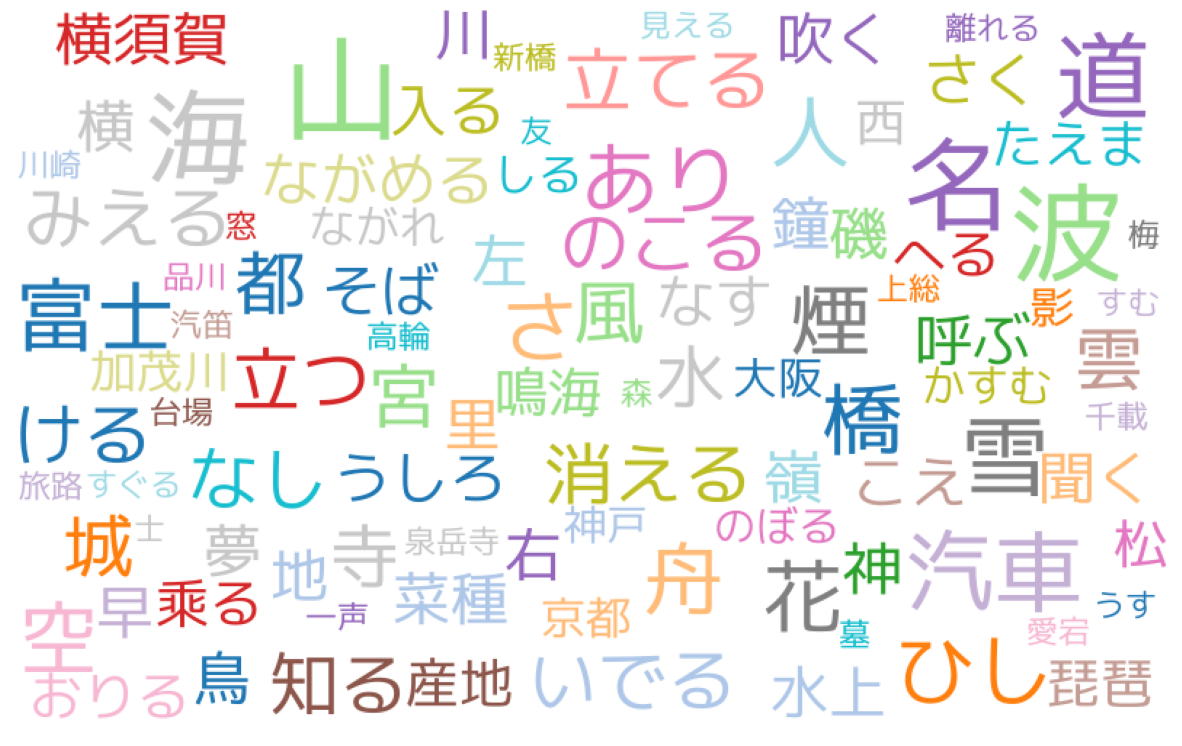

In [118]:
# nlplot https://www.takapy.work/entry/2020/05/17/192947
import nlplot
import matplotlib.pyplot as plt

npt = nlplot.NLPlot(df, target_col=0)
stopwords =[] # npt.get_stopword(top_n=3, min_freq=0) + ['なり', 'たり', 'ける', 'れる']
fig_wc = npt.wordcloud(stopwords=stopwords, colormap='tab20_r', max_words=100)
plt.figure(figsize=(15,25))
plt.imshow(fig_wc)
plt.axis('off')
plt.show()

